## First we install libraries or packages used in Python for various purposes:

- **pdfplumber**: This library is used to extract text, tables, and metadata from PDF files.
- **chromadb**: This is a library for managing and interacting with vector databases, useful for handling embeddings and similarity searches.
- **tiktoken**: This is used for tokenizing text, especially useful for working with OpenAI models, as it handles token limits and encoding efficiently.
- **nltk**: The Natural Language Toolkit is a library for working with human language data, providing tools for text processing, tokenization, stemming, tagging, parsing, and more.
- **openai**: This is the official library for interacting with OpenAI's API, allowing you to use models like GPT-3 and GPT-4.


In [1]:
# Install the following packages incase they're not loaded already
!pip install pdfplumber
!pip install chromadb
!pip install tiktoken
!pip install nltk
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.8 MB/s eta 0:00:00
  Installing build dependencies ... done

- **pathlib**: Provides classes representing filesystem paths with semantics appropriate for different operating systems.
- **pandas**: A powerful data manipulation and analysis library for Python, used for data cleaning and preparation.
- **operator**: This module exports a set of efficient functions corresponding to the intrinsic operators of Python.
- **json**: A library to parse JSON (JavaScript Object Notation), a popular data format used for data interchange.
- **tiktoken**: This is used for tokenizing text, especially useful for working with OpenAI models, as it handles token limits and encoding efficiently.
- **chromadb**: This is a library for managing and interacting with vector databases, useful for handling embeddings and similarity searches.
- **openai**: This is the official library for interacting with OpenAI's API, allowing you to use models like GPT-3 and GPT-4.
- **nltk**: The Natural Language Toolkit is a library for working with human language data, providing tools for text processing, tokenization, stemming, tagging, parsing, and more.
- **sklearn.metrics.pairwise**: This module provides functions to evaluate pairwise distances or affinity of sets of samples.


In [2]:
import pdfplumber
from pathlib import Path
import pandas as pd
from operator import itemgetter
import json
import tiktoken
import chromadb
import openai
import nltk
from chromadb import Client
from chromadb.config import Settings
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# openai.api_key = "Enter Your Open.ai API Key"
openai.api_key = "Enter Your API Key"

## RAG Stystem

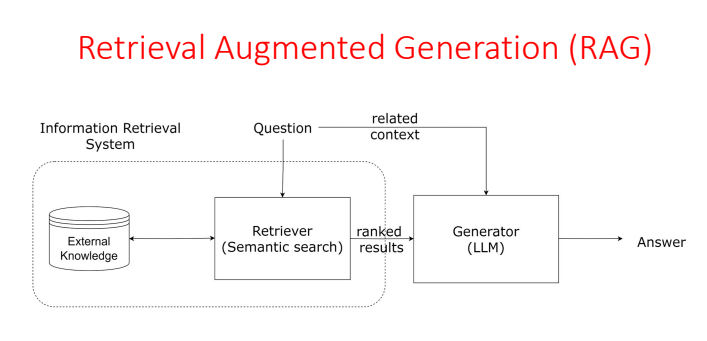

## RAG Pipeline

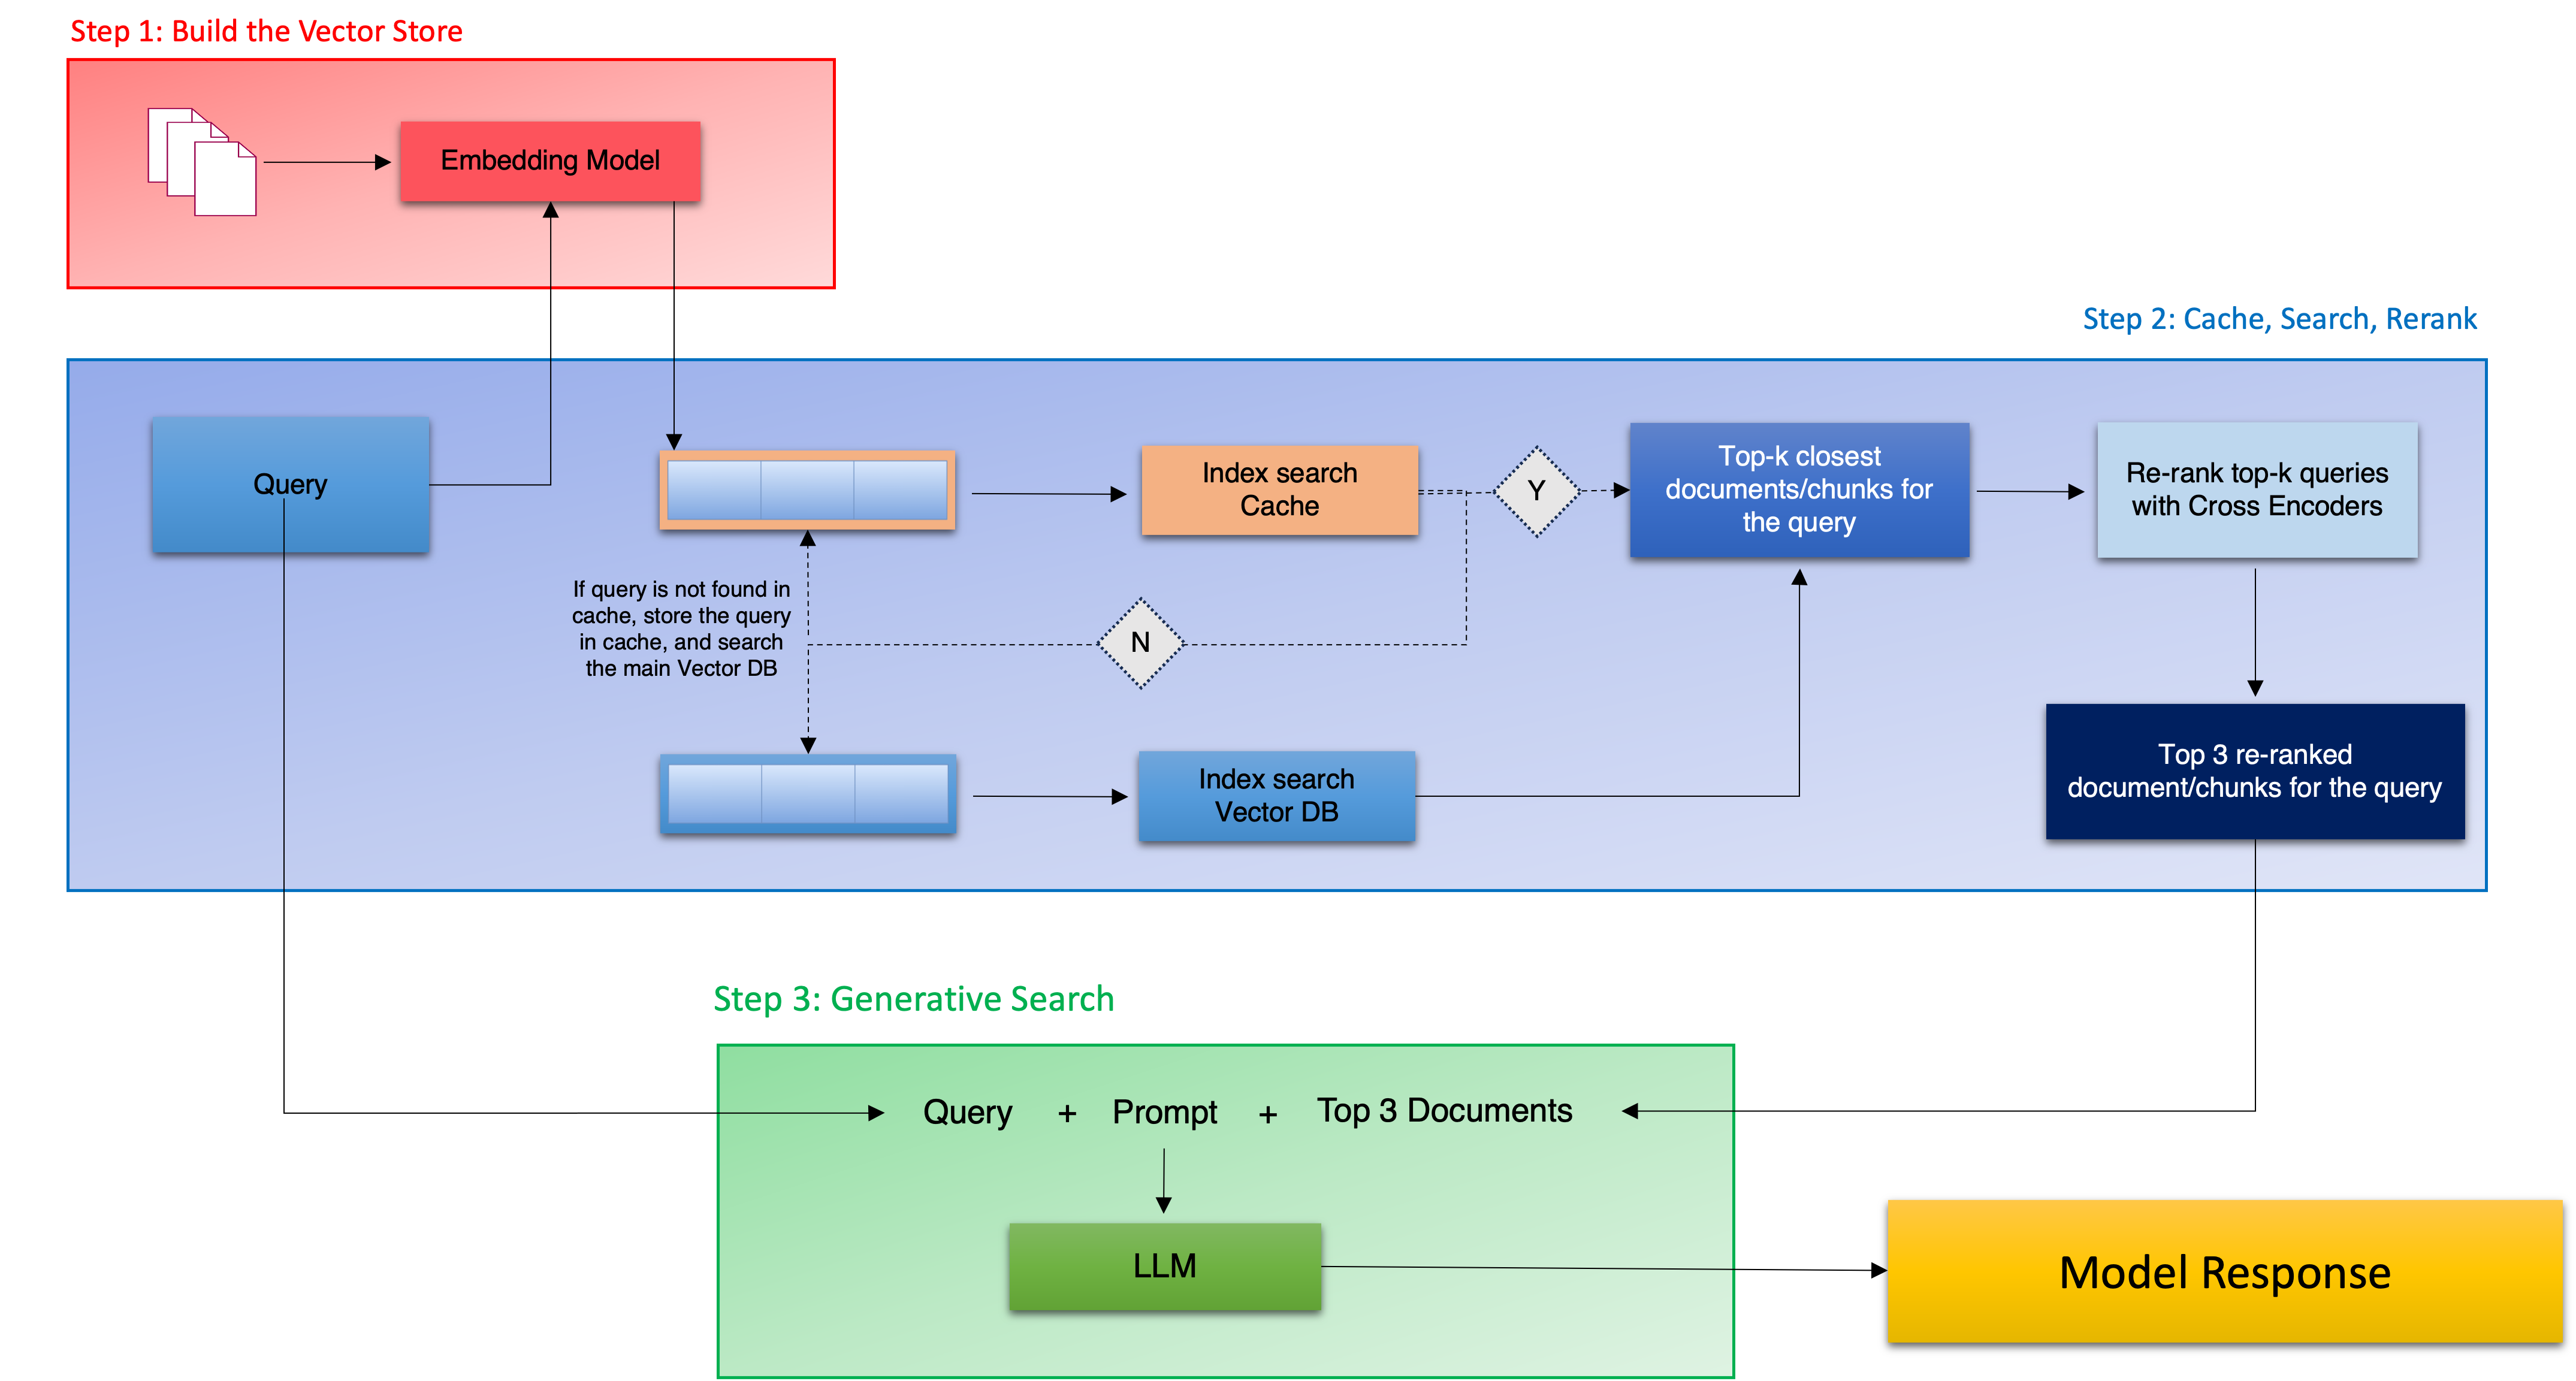

In [4]:
## Issues with normal LLMs
messages = [
    {"role":"system", "content":"You are an AI assistant to user."},
    {"role":"user", "content":"How many hours are worked by a member in a week under group policy?"},
          ]

In [5]:
## New method (as older completion and chatcompletion endpoints have been deprecated)
response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages)
response.choices[0].message.content

"Under most group policies, the standard number of hours worked by a full-time employee in a week is typically 40 hours. However, part-time employees may work fewer hours depending on their employment status and the company's policies. It's important to check your specific group policy or employment contract for the exact number of hours expected from a member in a week."

As we see the LLMs may not have access to your internal data, and therefore, they won't be able to **retrieve** information beyond the data that they have been trained on

Here's the relevant snippet from member work per week from Life Policy PDF.

Member
Any PERSON who is a full-time employee of the Policyholder and who regularly works at least
30 hours per week. The employee must be compensated by the Policyholder and either the
employer or employee must be able to show taxable income on federal or state tax forms. Work
must be at the Policyholder's usual place or places of business, at an alternative worksite at the
direction of the Policyholder, or at another place to which the employee must travel to perform
his or her regular duties. This excludes any person who is scheduled to work for the
Policyholder on a seasonal, temporary, contracted, or part-time basis.

In [6]:
retrieved = """Member
Any PERSON who is a full-time employee of the Policyholder and who regularly works at least
30 hours per week. The employee must be compensated by the Policyholder and either the
employer or employee must be able to show taxable income on federal or state tax forms. Work
must be at the Policyholder's usual place or places of business, at an alternative worksite at the
direction of the Policyholder, or at another place to which the employee must travel to perform
his or her regular duties. This excludes any person who is scheduled to work for the
Policyholder on a seasonal, temporary, contracted, or part-time basis.
"""

In [7]:
messages = [
    {"role":"system", "content":"You are an AI assistant to user."},
    {"role":"user", "content":f"""How many hours are worked by a member in a week under group policy? '{retrieved}' """},
          ]

In [8]:
response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages)
response.choices[0].message.content

"According to the group policy definition you provided, a member is considered a full-time employee if they regularly work at least 30 hours per week at the Policyholder's usual place or places of business, at an alternative worksite at the direction of the Policyholder, or at another place to which the employee must travel to perform their regular duties. This means that a member under the group policy works a minimum of 30 hours per week to be considered a full-time employee."

So what we did above was,
- We **retrieved** the information from an external source,
- **Augmented** our query with the relevant information prompt,
- and finally we **generated** the relevant response

This above process is RAG in a nutshell!

## Data Processing

Quite crucial, hence suggested to use good parsers that can load the data from your documents effectively.


In [9]:
pdf_path = "/content/plic.pdf"

In [10]:
# Function to check whether a word is present in a table or not for segregation of regular text and tables

def check_bboxes(word, table_bbox):
    # Check whether word is inside a table bbox.
    l = word['x0'], word['top'], word['x1'], word['bottom']
    r = table_bbox
    return l[0] > r[0] and l[1] > r[1] and l[2] < r[2] and l[3] < r[3]

In [11]:
# Function to extract text from a PDF file.
# 1. Declare a variable p to store the iteration of the loop that will help us store page numbers alongside the text
# 2. Declare an empty list 'full_text' to store all the text files
# 3. Use pdfplumber to open the pdf pages one by one
# 4. Find the tables and their locations in the page
# 5. Extract the text from the tables in the variable 'tables'
# 6. Extract the regular words by calling the function check_bboxes() and checking whether words are present in the table or not
# 7. Use the cluster_objects utility to cluster non-table and table words together so that they retain the same chronology as in the original PDF
# 8. Declare an empty list 'lines' to store the page text
# 9. If a text element in present in the cluster, append it to 'lines', else if a table element is present, append the table
# 10. Append the page number and all lines to full_text, and increment 'p'
# 11. When the function has iterated over all pages, return the 'full_text' list

def extract_text_from_pdf(pdf_path):
    p = 0
    full_text = []


    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_no = f"Page {p+1}"
            text = page.extract_text()

            tables = page.find_tables()
            table_bboxes = [i.bbox for i in tables]
            tables = [{'table': i.extract(), 'top': i.bbox[1]} for i in tables]
            non_table_words = [word for word in page.extract_words() if not any(
                [check_bboxes(word, table_bbox) for table_bbox in table_bboxes])]
            lines = []

            for cluster in pdfplumber.utils.cluster_objects(non_table_words + tables, itemgetter('top'), tolerance=5):

                if 'text' in cluster[0]:
                    try:
                        lines.append(' '.join([i['text'] for i in cluster]))
                    except KeyError:
                        pass

                elif 'table' in cluster[0]:
                    lines.append(json.dumps(cluster[0]['table']))


            full_text.append([page_no, " ".join(lines)])
            p +=1

    return full_text


In [12]:
# Define the directory containing the PDF files
pdf_path = Path("/content/plic.pdf")

# Initialize an empty list to store the extracted texts and document names
data = []

# Check if the file exists and is accessible
if not pdf_path.exists() or not pdf_path.is_file():
    print(f"File {pdf_path} does not exist or is not a file.")
else:
    print(f"Processing file {pdf_path.name}")

    # Call the function to extract the text from the PDF
    extracted_text = extract_text_from_pdf(pdf_path)

    # Check if the extracted text is not empty
    if extracted_text:
        # Convert the extracted list to a DataFrame, and add a column to store document names
        extracted_text_df = pd.DataFrame(extracted_text, columns=['Page No.', 'Page Text'])
        extracted_text_df['Document Name'] = pdf_path.name

        # Remove blank pages
        extracted_text_df = extracted_text_df[extracted_text_df['Page Text'].str.strip() != "This page left blank intentionally"]

        # Append the extracted text and document name to the list
        data.append(extracted_text_df)

        # Print a message to indicate progress
        print(f"Finished processing {pdf_path.name}")
    else:
        print(f"No text extracted from {pdf_path.name}")

    # Check if data list is not empty before concatenating
    if data:
        policy_pdf_data = pd.concat(data, ignore_index=True)
        print("Data concatenation successful.")
        print(policy_pdf_data.head())  # Print the first few rows to verify the content
    else:
        print("No data to concatenate. Please check the PDF file and extraction process.")

Processing file plic.pdf
Finished processing plic.pdf
Data concatenation successful.
  Page No.                                          Page Text Document Name
0   Page 1  DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...      plic.pdf
1   Page 3  POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...      plic.pdf
2   Page 5  PRINCIPAL LIFE INSURANCE COMPANY (called The P...      plic.pdf
3   Page 6  TABLE OF CONTENTS PART I - DEFINITIONS PART II...      plic.pdf
4   Page 7  Section A – Eligibility Member Life Insurance ...      plic.pdf


In [13]:
len(policy_pdf_data)

61

In [14]:
policy_pdf_data['Metadata'] = policy_pdf_data.apply(lambda x: {'filing_name': x['Document Name'][:-4], 'Page_No.': x['Page No.']}, axis=1)

In [15]:
policy_pdf_data.head()

,Page No.,Page Text,Document Name,Metadata
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,plic.pdf,"{'filing_name': 'plic', 'Page_No.': 'Page 1'}"
1,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,plic.pdf,"{'filing_name': 'plic', 'Page_No.': 'Page 3'}"
2,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,plic.pdf,"{'filing_name': 'plic', 'Page_No.': 'Page 5'}"
3,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,plic.pdf,"{'filing_name': 'plic', 'Page_No.': 'Page 6'}"
4,Page 7,Section A – Eligibility Member Life Insurance ...,plic.pdf,"{'filing_name': 'plic', 'Page_No.': 'Page 7'}"


In [16]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Here we applied Semantic Chunking

**Semantic chunking** refers to the process of breaking down a text into smaller, meaningful units, or "chunks," based on their semantic content rather than just syntactic boundaries like sentences or paragraphs.

### Why Use Semantic Chunking?

- **Improved Understanding**: By grouping text into semantically coherent chunks, it becomes easier to process and understand the information.
- **Enhanced Information Retrieval**: It allows for more accurate search and retrieval of relevant information within a document, as each chunk represents a complete idea or concept.
- **Efficient Text Processing**: Semantic chunks can be processed individually, making tasks such as summarization, question answering, and text generation more efficient.
- **Better Context Handling**: Helps in maintaining context when dealing with large documents, as each chunk is contextually meaningful.

### When to Use Semantic Chunking?

- **Natural Language Processing (NLP) Tasks**: Tasks such as summarization, translation, and question answering benefit from semantic chunking.
- **Document Analysis**: When analyzing lengthy documents like research papers, reports, or books, semantic chunking helps in breaking down the content for detailed examination.
- **Text Data Preprocessing**: Preparing text data for machine learning models often involves semantic chunking to ensure that input data is contextually relevant and meaningful.
- **Chatbots and Virtual Assistants**: For better understanding and generating responses based on user queries, semantic chunking ensures that the context is preserved and responses are accurate.

By using semantic chunking, one can ensure that the processing of text data is both meaningful and efficient, leading to better performance in various NLP applications.


In [17]:
def semantic_chunking(text, threshold=400):
    sentences = sent_tokenize(text)
    chunks, current_chunk, current_length = [], [], 0

    for sentence in sentences:[]
        current_chunk.append(sentence)
        current_length += len(sentence) + 1  # Adding 1 for the space between sentences

        if current_length > threshold:  # Adjustable threshold
            chunks.append(' '.join(current_chunk))
            current_chunk, current_length = [], 0

    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks


In [18]:
def semantic_chunking(text, threshold=400):
    # Check if the text is indicating a blank page
    if "This page left blank intentionally" in text:
        return ["This page left blank intentionally"]

    if not text.strip():  # Check if the text is empty or consists only of whitespace
        return []

    sentences = sent_tokenize(text)
    chunks, current_chunk, current_length = [], [], 0

    for sentence in sentences:
        current_chunk.append(sentence)
        current_length += len(sentence) + 1  # Adding 1 for the space between sentences

        if current_length > threshold:  # Adjustable threshold
            chunks.append(' '.join(current_chunk))
            current_chunk, current_length = [], 0

    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks

In [19]:
# Apply semantic chunking to each page's text
policy_pdf_data['Chunks Text'] = policy_pdf_data['Page Text'].apply(lambda x: semantic_chunking(x, threshold=400))

# Display the DataFrame with chunks
print(policy_pdf_data[['Page No.', 'Chunks Text']])

   Page No.                                        Chunks Text
0    Page 1  [DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01...
1    Page 3  [POLICY RIDER GROUP INSURANCE POLICY NO: S655 ...
2    Page 5  [PRINCIPAL LIFE INSURANCE COMPANY (called The ...
3    Page 6  [TABLE OF CONTENTS PART I - DEFINITIONS PART I...
4    Page 7  [Section A – Eligibility Member Life Insurance...
..      ...                                                ...
56  Page 59  [Section C - Dependent Life Insurance Article ...
57  Page 60  [I f a Dependent who was insured dies during t...
58  Page 61  [Section D - Claim Procedures Article 1 - Noti...
59  Page 62  [A claimant may request an appeal of a claim d...
60  Page 64  [Principal Life Insurance Company Des Moines, ...

[61 rows x 2 columns]


In [20]:
policy_pdf_data.head()

,Page No.,Page Text,Document Name,Metadata,Chunks Text
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,plic.pdf,"{'filing_name': 'plic', 'Page_No.': 'Page 1'}",[DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01...
1,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,plic.pdf,"{'filing_name': 'plic', 'Page_No.': 'Page 3'}",[POLICY RIDER GROUP INSURANCE POLICY NO: S655 ...
2,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,plic.pdf,"{'filing_name': 'plic', 'Page_No.': 'Page 5'}",[PRINCIPAL LIFE INSURANCE COMPANY (called The ...
3,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,plic.pdf,"{'filing_name': 'plic', 'Page_No.': 'Page 6'}",[TABLE OF CONTENTS PART I - DEFINITIONS PART I...
4,Page 7,Section A – Eligibility Member Life Insurance ...,plic.pdf,"{'filing_name': 'plic', 'Page_No.': 'Page 7'}",[Section A – Eligibility Member Life Insurance...


In [21]:
def print_chunks(df):
    for index, row in df.iterrows():
        print(f"\n{row['Page No.']}:")
        for i, chunk in enumerate(row['Chunks Text']):
            print(f"  Chunk {i+1} (Length: {len(chunk)} characters):\n    {chunk}\n")

# Print the chunks for cross-verification
print_chunks(policy_pdf_data)


Page 1:
  Chunk 1 (Length: 188 characters):
    DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/01/2014 711 HIGH STREET GEORGE RI 02903 GROUP POLICY FOR: RHODE ISLAND JOHN DOE ALL MEMBERS Group Member Life Insurance Print Date: 07/16/2014


Page 3:
  Chunk 1 (Length: 465 characters):
    POLICY RIDER GROUP INSURANCE POLICY NO: S655 COVERAGE: Life EMPLOYER: RHODE ISLAND JOHN DOE Effective on the later of the Date of Issue of this Group Policy or March 1, 2005, the following will apply to your Policy: From time to time The Principal may offer or provide certain employer groups who apply for coverage with The Principal a Financial Services Hotline and Grief Support Services or any other value added service for the employees of that employer group.

  Chunk 2 (Length: 492 characters):
    In addition, The Principal may arrange for third party service providers (i.e., optometrists, health clubs), to provide discounted goods and services to those employer groups who apply for coverage with Th

## Generate and Store Embeddings using OpenAI and ChromaDB

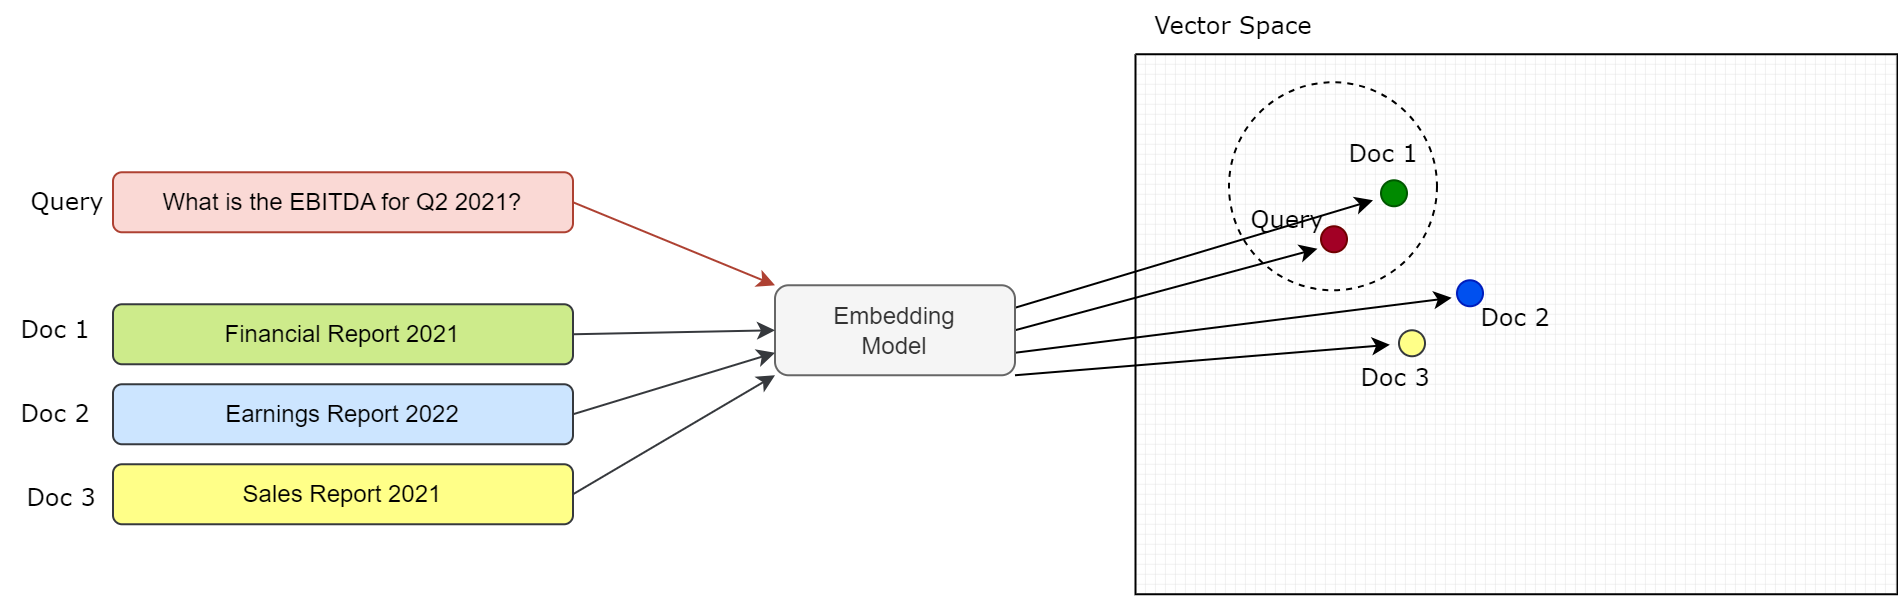

In [22]:
# Import the OpenAI Embedding Function into chroma

from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction

In [23]:
# Define the path where chroma collections will be stored

chroma_data_path = "/content/vector_database"

In [24]:
# Call PersistentClient()

client = chromadb.PersistentClient(path=chroma_data_path)

In [25]:
# Set up the embedding function using the OpenAI embedding model

model = "text-embedding-ada-002"
embedding_function = OpenAIEmbeddingFunction(api_key=openai.api_key, model_name=model)

In [26]:
## Create an empty collection
policydata_collection = client.get_or_create_collection(name='RAG_on_Policy', embedding_function=embedding_function)

In [27]:
documents_list = policy_pdf_data["Chunks Text"].tolist()
# documents_list = policy_pdf_data["Page Text"].tolist()
metadata_list = policy_pdf_data['Metadata'].tolist()

In [28]:
print(policy_pdf_data.isna().sum())

Page No.         0
Page Text        0
Document Name    0
Metadata         0
Chunks Text      0
dtype: int64


In [29]:
metadata_list

[{'filing_name': 'plic', 'Page_No.': 'Page 1'},
 {'filing_name': 'plic', 'Page_No.': 'Page 3'},
 {'filing_name': 'plic', 'Page_No.': 'Page 5'},
 {'filing_name': 'plic', 'Page_No.': 'Page 6'},
 {'filing_name': 'plic', 'Page_No.': 'Page 7'},
 {'filing_name': 'plic', 'Page_No.': 'Page 8'},
 {'filing_name': 'plic', 'Page_No.': 'Page 9'},
 {'filing_name': 'plic', 'Page_No.': 'Page 10'},
 {'filing_name': 'plic', 'Page_No.': 'Page 11'},
 {'filing_name': 'plic', 'Page_No.': 'Page 12'},
 {'filing_name': 'plic', 'Page_No.': 'Page 13'},
 {'filing_name': 'plic', 'Page_No.': 'Page 14'},
 {'filing_name': 'plic', 'Page_No.': 'Page 15'},
 {'filing_name': 'plic', 'Page_No.': 'Page 16'},
 {'filing_name': 'plic', 'Page_No.': 'Page 17'},
 {'filing_name': 'plic', 'Page_No.': 'Page 18'},
 {'filing_name': 'plic', 'Page_No.': 'Page 19'},
 {'filing_name': 'plic', 'Page_No.': 'Page 20'},
 {'filing_name': 'plic', 'Page_No.': 'Page 21'},
 {'filing_name': 'plic', 'Page_No.': 'Page 22'},
 {'filing_name': 'plic', 'P

In [30]:
documents_list = [str(doc) if not isinstance(doc, str) else doc for doc in documents_list]

# Generate generic integer IDs
ids = [str(i) for i in range(0, len(documents_list))]

In [31]:
documents_list

["['DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/01/2014 711 HIGH STREET GEORGE RI 02903 GROUP POLICY FOR: RHODE ISLAND JOHN DOE ALL MEMBERS Group Member Life Insurance Print Date: 07/16/2014']",
 "['POLICY RIDER GROUP INSURANCE POLICY NO: S655 COVERAGE: Life EMPLOYER: RHODE ISLAND JOHN DOE Effective on the later of the Date of Issue of this Group Policy or March 1, 2005, the following will apply to your Policy: From time to time The Principal may offer or provide certain employer groups who apply for coverage with The Principal a Financial Services Hotline and Grief Support Services or any other value added service for the employees of that employer group.', 'In addition, The Principal may arrange for third party service providers (i.e., optometrists, health clubs), to provide discounted goods and services to those employer groups who apply for coverage with The Principal or who become insureds/enrollees of The Principal. While The Principal has arranged these goods, services and/or 

In [32]:
# Add the documents and metadata to the collection alongwith generic integer IDs. You can also feed the metadata information as IDs by combining the policy name and page no.
policydata_collection.add(
    documents = documents_list,
    ids = [str(i) for i in range(0, len(documents_list))],
    metadatas = metadata_list
)

In [33]:
policydata_collection.peek(1)

{'ids': ['0'],
 'embeddings': [[-0.031365446746349335,
   0.02118045650422573,
   -0.02666468359529972,
   -0.029501350596547127,
   -0.002490527229383588,
   0.03204084560275078,
   0.0001282199373235926,
   0.01784399524331093,
   -0.023274188861250877,
   -0.0030359106604009867,
   0.00018773932242766023,
   0.013170246034860611,
   -0.008226337842643261,
   0.01620953343808651,
   -0.009867553599178791,
   0.028988048434257507,
   0.003395559499040246,
   -0.024800585582852364,
   0.02731306478381157,
   0.004184085875749588,
   0.007280782330781221,
   0.017911534756422043,
   0.007071408908814192,
   0.012852809391915798,
   -0.008888227865099907,
   -0.009144878946244717,
   0.009840537793934345,
   -0.021072393283247948,
   0.022234076634049416,
   0.010603736154735088,
   0.015007326379418373,
   -0.015061357989907265,
   -0.038308531045913696,
   -0.0456298366189003,
   -0.00429890351369977,
   0.016992993652820587,
   -0.005311999004334211,
   -0.006321717984974384,
   0.015

In [34]:
print(f"Number of documents: {len(documents_list)}")
print(f"Number of metadata entries: {len(metadata_list)}")

Number of documents: 61
Number of metadata entries: 61


In [35]:
cache_collection = client.get_or_create_collection(name='Policy_Cache', embedding_function=embedding_function)

In [36]:
cache_data = policydata_collection.peek()

In [37]:
cache_data

{'ids': ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17'],
 'embeddings': [[-0.031365446746349335,
   0.02118045650422573,
   -0.02666468359529972,
   -0.029501350596547127,
   -0.002490527229383588,
   0.03204084560275078,
   0.0001282199373235926,
   0.01784399524331093,
   -0.023274188861250877,
   -0.0030359106604009867,
   0.00018773932242766023,
   0.013170246034860611,
   -0.008226337842643261,
   0.01620953343808651,
   -0.009867553599178791,
   0.028988048434257507,
   0.003395559499040246,
   -0.024800585582852364,
   0.02731306478381157,
   0.004184085875749588,
   0.007280782330781221,
   0.017911534756422043,
   0.007071408908814192,
   0.012852809391915798,
   -0.008888227865099907,
   -0.009144878946244717,
   0.009840537793934345,
   -0.021072393283247948,
   0.022234076634049416,
   0.010603736154735088,
   0.015007326379418373,
   -0.015061357989907265,
   -0.038308531045913696,
   -0.0456298366189003,
   -0.00429890351369977,
   0.016992993652820587,
   -0.0

In [38]:
cache_collection.peek()

{'ids': [],
 'embeddings': [],
 'metadatas': [],
 'documents': [],
 'uris': None,
 'data': None,
 'included': ['embeddings', 'metadatas', 'documents']}

### query_1
* How many hours are worked by a member in a week under group policy?

In [39]:
# Read the user query
query = input()

How many hours are worked by a member in a week under group policy?


In [40]:
query

'How many hours are worked by a member in a week under group policy?'

In [41]:
## Quickly checking the results of the query
results = policydata_collection.query(
      query_texts=query,
      n_results=10
      )

In [42]:
results

{'ids': [['9', '38', '25', '21', '6', '14', '28', '34', '24', '33']],
 'distances': [[0.39329466697042914,
   0.3944282968258879,
   0.4017956192998424,
   0.4035520876432068,
   0.4067669472928872,
   0.407616591979128,
   0.4115554696275597,
   0.41494025344952173,
   0.41586961007240847,
   0.41870559909098753]],
 'metadatas': [[{'Page_No.': 'Page 12', 'filing_name': 'plic'},
   {'Page_No.': 'Page 41', 'filing_name': 'plic'},
   {'Page_No.': 'Page 28', 'filing_name': 'plic'},
   {'Page_No.': 'Page 24', 'filing_name': 'plic'},
   {'Page_No.': 'Page 9', 'filing_name': 'plic'},
   {'Page_No.': 'Page 17', 'filing_name': 'plic'},
   {'Page_No.': 'Page 31', 'filing_name': 'plic'},
   {'Page_No.': 'Page 37', 'filing_name': 'plic'},
   {'Page_No.': 'Page 27', 'filing_name': 'plic'},
   {'Page_No.': 'Page 36', 'filing_name': 'plic'}]],
 'embeddings': None,
 'documents': [['[\'An institution that is licensed as a Hospital by the proper authority of the state in which it is l ocated, but not i

In [43]:
for key, val in results.items():
  print(key)

ids
distances
metadatas
embeddings
documents
uris
data
included


In [44]:
for key, val in results.items():
  print(val)

[['9', '38', '25', '21', '6', '14', '28', '34', '24', '33']]
[[0.39329466697042914, 0.3944282968258879, 0.4017956192998424, 0.4035520876432068, 0.4067669472928872, 0.407616591979128, 0.4115554696275597, 0.41494025344952173, 0.41586961007240847, 0.41870559909098753]]
[[{'Page_No.': 'Page 12', 'filing_name': 'plic'}, {'Page_No.': 'Page 41', 'filing_name': 'plic'}, {'Page_No.': 'Page 28', 'filing_name': 'plic'}, {'Page_No.': 'Page 24', 'filing_name': 'plic'}, {'Page_No.': 'Page 9', 'filing_name': 'plic'}, {'Page_No.': 'Page 17', 'filing_name': 'plic'}, {'Page_No.': 'Page 31', 'filing_name': 'plic'}, {'Page_No.': 'Page 37', 'filing_name': 'plic'}, {'Page_No.': 'Page 27', 'filing_name': 'plic'}, {'Page_No.': 'Page 36', 'filing_name': 'plic'}]]
None
[['[\'An institution that is licensed as a Hospital by the proper authority of the state in which it is l ocated, but not including any institution, or part thereof, that is used primarily as a clinic, Skilled Nursing Facility, convalescent home,

In [45]:
# Searh the Cache collection first
# Query the collection against the user query and return the top result

cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

In [46]:
import pandas as pd

# Set a threshold for cache search
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()

# Assuming cache_results is obtained from some previous operations
# cache_results = ...

# If the distance is greater than the threshold, then return the results from the main collection.
if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
    # Query the collection against the user query and return the top 10 results
    results = policydata_collection.query(
        query_texts=query,
        n_results=10
    )

    # Store the query in cache_collection as a document w.r.t to ChromaDB so that it can be embedded and searched against later
    # Store retrieved text, ids, distances, and metadatas in cache_collection as metadatas, so they can be fetched easily if a query indeed matches to a query in cache
    Keys = []
    Values = []

    for key, val in results.items():
        if key not in ['embeddings', 'uris', 'data']:
            for i in range(len(val[0])):  # Use len(val[0]) to avoid index errors
                Keys.append(f"{key}{i}")
                Values.append(str(val[0][i]))

    cache_collection.add(
        documents=[query],
        ids=[query],  # Or if you want to assign integers as IDs 0,1,2,.., then you can use "len(cache_results['documents'])" as will return the no. of queries currently in the cache and assign the next digit to the new query.
        metadatas=[dict(zip(Keys, Values))]
    )

    print("Not found in cache. Found in main collection.")

    result_dict = {
        'Metadatas': results['metadatas'][0],
        'Documents': results['documents'][0],
        'Distances': results['distances'][0],
        'IDs': results['ids'][0]
    }
    results_df = pd.DataFrame.from_dict(result_dict)
    print(results_df)

# If the distance is less than the threshold, return the results from cache
elif cache_results['distances'][0][0] <= threshold:
    cache_result_dict = cache_results['metadatas'][0][0]

    # Loop through each inner list and then through the dictionary
    for key, value in cache_result_dict.items():
        if 'ids' in key:
            ids.append(value)
        elif 'documents' in key:
            documents.append(value)
        elif 'distances' in key:
            distances.append(value)
        elif 'metadatas' in key:
            metadatas.append(value)

    print("Found in cache!")

    # Create a DataFrame
    results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
    })

    print(results_df)



Not found in cache. Found in main collection.
                                        Metadatas  \
0  {'Page_No.': 'Page 12', 'filing_name': 'plic'}   
1  {'Page_No.': 'Page 41', 'filing_name': 'plic'}   
2  {'Page_No.': 'Page 28', 'filing_name': 'plic'}   
3  {'Page_No.': 'Page 24', 'filing_name': 'plic'}   
4   {'Page_No.': 'Page 9', 'filing_name': 'plic'}   
5  {'Page_No.': 'Page 17', 'filing_name': 'plic'}   
6  {'Page_No.': 'Page 31', 'filing_name': 'plic'}   
7  {'Page_No.': 'Page 37', 'filing_name': 'plic'}   
8  {'Page_No.': 'Page 27', 'filing_name': 'plic'}   
9  {'Page_No.': 'Page 36', 'filing_name': 'plic'}   

                                           Documents  Distances IDs  
0  ['An institution that is licensed as a Hospita...   0.393229   9  
1  ['I f coverage for a Member or Dependent termi...   0.394436  38  
2  ["Section B - Effective Dates Article 1 - Memb...   0.401751  25  
3  ["T he Principal may terminate the Policyholde...   0.403540  21  
4  ['P ART I - DEFIN

In [47]:
results_df

,Metadatas,Documents,Distances,IDs
0,"{'Page_No.': 'Page 12', 'filing_name': 'plic'}",['An institution that is licensed as a Hospita...,0.393229,9
1,"{'Page_No.': 'Page 41', 'filing_name': 'plic'}",['I f coverage for a Member or Dependent termi...,0.394436,38
2,"{'Page_No.': 'Page 28', 'filing_name': 'plic'}","[""Section B - Effective Dates Article 1 - Memb...",0.401751,25
3,"{'Page_No.': 'Page 24', 'filing_name': 'plic'}","[""T he Principal may terminate the Policyholde...",0.403540,21
4,"{'Page_No.': 'Page 9', 'filing_name': 'plic'}",['P ART I - DEFINITIONS When used in this Grou...,0.406817,6
5,"{'Page_No.': 'Page 17', 'filing_name': 'plic'}",['a. be actively engaged in business for profi...,0.407534,14
6,"{'Page_No.': 'Page 31', 'filing_name': 'plic'}",['Scheduled Benefit in force for the Member be...,0.411417,28
7,"{'Page_No.': 'Page 37', 'filing_name': 'plic'}",['b. a business assignment; or c. full-time st...,0.414855,34
8,"{'Page_No.': 'Page 27', 'filing_name': 'plic'}","[""I f a Member's Dependent is employed and is ...",0.415727,24
9,"{'Page_No.': 'Page 36', 'filing_name': 'plic'}","[""A Member's insurance under this Group Policy...",0.418717,33


In [48]:
## Checking if the cache also contains the results
cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

## 5. <font color = red> Re-Ranking with a Cross Encoder

Re-ranking the results obtained from your semantic search can sometime significantly improve the relevance of the retrieved results. This is often done by passing the query paired with each of the retrieved responses into a cross-encoder to score the relevance of the response w.r.t. the query.

https://www.sbert.net/examples/applications/retrieve_rerank/README.html


<br>

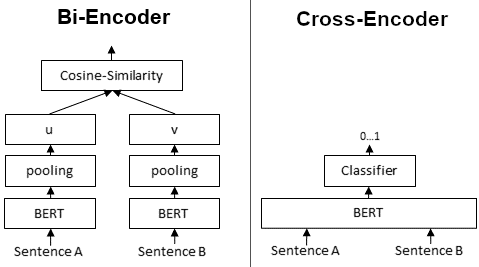

<br>

In [49]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [50]:
# Import the CrossEncoder library from sentence_transformers
from sentence_transformers import CrossEncoder, util

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [51]:
# Initialise the cross encoder model
cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [52]:
# Test the cross encoder model

scores = cross_encoder.predict([['How many hours work by member in a week in group policy', 'The 30 hours per ween Work by member in a week in group policy'],
                                ['How many hours work by member in a week in group policy', 'The work done by member in a week better than other policy.']])

In [53]:
scores

array([9.762255 , 1.8855056], dtype=float32)

In [54]:
# Input (query, response) pairs for each of the top 20 responses received from the semantic search to the cross encoder
# Generate the cross_encoder scores for these pairs

cross_inputs = [[query, response] for response in results_df['Documents']]
cross_rerank_scores = cross_encoder.predict(cross_inputs)

In [55]:
 #Store the rerank_scores in results_df

results_df['Reranked_scores'] = cross_rerank_scores

In [56]:
results_df

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'Page_No.': 'Page 12', 'filing_name': 'plic'}",['An institution that is licensed as a Hospita...,0.393229,9,-0.817610
1,"{'Page_No.': 'Page 41', 'filing_name': 'plic'}",['I f coverage for a Member or Dependent termi...,0.394436,38,-1.024667
2,"{'Page_No.': 'Page 28', 'filing_name': 'plic'}","[""Section B - Effective Dates Article 1 - Memb...",0.401751,25,-3.895415
3,"{'Page_No.': 'Page 24', 'filing_name': 'plic'}","[""T he Principal may terminate the Policyholde...",0.403540,21,-6.377305
4,"{'Page_No.': 'Page 9', 'filing_name': 'plic'}",['P ART I - DEFINITIONS When used in this Grou...,0.406817,6,-2.505790
5,"{'Page_No.': 'Page 17', 'filing_name': 'plic'}",['a. be actively engaged in business for profi...,0.407534,14,-8.522293
6,"{'Page_No.': 'Page 31', 'filing_name': 'plic'}",['Scheduled Benefit in force for the Member be...,0.411417,28,-4.447973
7,"{'Page_No.': 'Page 37', 'filing_name': 'plic'}",['b. a business assignment; or c. full-time st...,0.414855,34,-9.460055
8,"{'Page_No.': 'Page 27', 'filing_name': 'plic'}","[""I f a Member's Dependent is employed and is ...",0.415727,24,-6.893219
9,"{'Page_No.': 'Page 36', 'filing_name': 'plic'}","[""A Member's insurance under this Group Policy...",0.418717,33,-4.459386


In [57]:
# Return the top 3 results from semantic search
top_3_semantic = results_df.sort_values(by='Distances')
top_3_semantic[:3]

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'Page_No.': 'Page 12', 'filing_name': 'plic'}",['An institution that is licensed as a Hospita...,0.393229,9,-0.817610
1,"{'Page_No.': 'Page 41', 'filing_name': 'plic'}",['I f coverage for a Member or Dependent termi...,0.394436,38,-1.024667
2,"{'Page_No.': 'Page 28', 'filing_name': 'plic'}","[""Section B - Effective Dates Article 1 - Memb...",0.401751,25,-3.895415


In [58]:
# Return the top 3 results after reranking

top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank[:3]
top_3_RAG = top_3_rerank[["Documents", "Metadatas"]][:3]

In [59]:
top_3_RAG

,Documents,Metadatas
0,['An institution that is licensed as a Hospita...,"{'Page_No.': 'Page 12', 'filing_name': 'plic'}"
1,['I f coverage for a Member or Dependent termi...,"{'Page_No.': 'Page 41', 'filing_name': 'plic'}"
4,['P ART I - DEFINITIONS When used in this Grou...,"{'Page_No.': 'Page 9', 'filing_name': 'plic'}"


## Build the RAG system

In [60]:
retrieved = list(top_3_RAG['Documents'][:3])

In [61]:
retrieved

['[\'An institution that is licensed as a Hospital by the proper authority of the state in which it is l ocated, but not including any institution, or part thereof, that is used primarily as a clinic, Skilled Nursing Facility, convalescent home, rest home, home for the aged, nursing home, custodial care facility, or training center. Insurance Month Calendar Month. Member Any PERSON who is a full-time employee of the Policyholder and who regularly works at least 30 hours per week.\', "The employee must be compensated by the Policyholder and either the employer or employee must be able to show taxable income on federal or state tax forms. Work must be at the Policyholder\'s usual place or places of business, at an alternative worksite at the direction of the Policyholder, or at another place to which the employee must travel to perform his or her regular duties. This excludes any person who is scheduled to work for the Policyholder on a seasonal, temporary, contracted, or part-time basis

In [62]:
messages = [
    {"role":"system", "content":"You are an AI assistant to user."},
    {"role":"user", "content":f"""How many hours work by member in a week in group policy?. You are provided the life insurance policy document'{retrieved}' """},
          ]

In [63]:
response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages)
response.choices[0].message.content

'Based on the provided information from the life insurance policy document, a member in a group policy is defined as any PERSON who is a full-time employee of the Policyholder and who regularly works at least 30 hours per week. This means that a member is required to work a minimum of 30 hours per week to be considered eligible under the group policy.'

### query_2
* Is there a deadline for filing an appea?

In [64]:
query_2 = query=input()

Is there a deadline for filing an appea?


In [65]:
query_2

'Is there a deadline for filing an appea?'

In [66]:
## Quickly checking the results of the query
results = policydata_collection.query(
      query_texts=query,
      n_results=10
      )

In [67]:
results

{'ids': [['59', '58', '34', '48', '14', '21', '24', '51', '15', '47']],
 'distances': [[0.36617579042379067,
   0.44167125363970505,
   0.46806993094147115,
   0.4699660989847679,
   0.47038522284761186,
   0.47543532860929677,
   0.4803438081771029,
   0.4812084569604623,
   0.48707381071921835,
   0.4871003939552572]],
 'metadatas': [[{'Page_No.': 'Page 62', 'filing_name': 'plic'},
   {'Page_No.': 'Page 61', 'filing_name': 'plic'},
   {'Page_No.': 'Page 37', 'filing_name': 'plic'},
   {'Page_No.': 'Page 51', 'filing_name': 'plic'},
   {'Page_No.': 'Page 17', 'filing_name': 'plic'},
   {'Page_No.': 'Page 24', 'filing_name': 'plic'},
   {'Page_No.': 'Page 27', 'filing_name': 'plic'},
   {'Page_No.': 'Page 54', 'filing_name': 'plic'},
   {'Page_No.': 'Page 18', 'filing_name': 'plic'},
   {'Page_No.': 'Page 50', 'filing_name': 'plic'}]],
 'embeddings': None,
 'documents': [['[\'A claimant may request an appeal of a claim denial by Written request to The Principal within 180 days of recei

In [68]:
for key, val in results.items():
  print(key)

ids
distances
metadatas
embeddings
documents
uris
data
included


In [69]:
for key, val in results.items():
  print(val)

[['59', '58', '34', '48', '14', '21', '24', '51', '15', '47']]
[[0.36617579042379067, 0.44167125363970505, 0.46806993094147115, 0.4699660989847679, 0.47038522284761186, 0.47543532860929677, 0.4803438081771029, 0.4812084569604623, 0.48707381071921835, 0.4871003939552572]]
[[{'Page_No.': 'Page 62', 'filing_name': 'plic'}, {'Page_No.': 'Page 61', 'filing_name': 'plic'}, {'Page_No.': 'Page 37', 'filing_name': 'plic'}, {'Page_No.': 'Page 51', 'filing_name': 'plic'}, {'Page_No.': 'Page 17', 'filing_name': 'plic'}, {'Page_No.': 'Page 24', 'filing_name': 'plic'}, {'Page_No.': 'Page 27', 'filing_name': 'plic'}, {'Page_No.': 'Page 54', 'filing_name': 'plic'}, {'Page_No.': 'Page 18', 'filing_name': 'plic'}, {'Page_No.': 'Page 50', 'filing_name': 'plic'}]]
None
[['[\'A claimant may request an appeal of a claim denial by Written request to The Principal within 180 days of receipt of notice of the denial. The Principal will make a full and fair review of the claim. The Principal may require addition

In [70]:
# Searh the Cache collection first
# Query the collection against the user query and return the top result

cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

In [71]:
import pandas as pd

# Set a threshold for cache search
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()

# Assuming cache_results is obtained from some previous operations
# cache_results = ...

# If the distance is greater than the threshold, then return the results from the main collection.
if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
    # Query the collection against the user query and return the top 10 results
    results = policydata_collection.query(
        query_texts=query,
        n_results=10
    )

    # Store the query in cache_collection as a document w.r.t to ChromaDB so that it can be embedded and searched against later
    # Store retrieved text, ids, distances, and metadatas in cache_collection as metadatas, so they can be fetched easily if a query indeed matches to a query in cache
    Keys = []
    Values = []

    for key, val in results.items():
        if key not in ['embeddings', 'uris', 'data']:
            for i in range(len(val[0])):  # Use len(val[0]) to avoid index errors
                Keys.append(f"{key}{i}")
                Values.append(str(val[0][i]))

    cache_collection.add(
        documents=[query],
        ids=[query],  # Or if you want to assign integers as IDs 0,1,2,.., then you can use "len(cache_results['documents'])" as will return the no. of queries currently in the cache and assign the next digit to the new query.
        metadatas=[dict(zip(Keys, Values))]
    )

    print("Not found in cache. Found in main collection.")

    result_dict = {
        'Metadatas': results['metadatas'][0],
        'Documents': results['documents'][0],
        'Distances': results['distances'][0],
        'IDs': results['ids'][0]
    }
    results_df = pd.DataFrame.from_dict(result_dict)
    print(results_df)

# If the distance is less than the threshold, return the results from cache
elif cache_results['distances'][0][0] <= threshold:
    cache_result_dict = cache_results['metadatas'][0][0]

    # Loop through each inner list and then through the dictionary
    for key, value in cache_result_dict.items():
        if 'ids' in key:
            ids.append(value)
        elif 'documents' in key:
            documents.append(value)
        elif 'distances' in key:
            distances.append(value)
        elif 'metadatas' in key:
            metadatas.append(value)

    print("Found in cache!")

    # Create a DataFrame
    results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
    })

    print(results_df)



Not found in cache. Found in main collection.
                                        Metadatas  \
0  {'Page_No.': 'Page 62', 'filing_name': 'plic'}   
1  {'Page_No.': 'Page 61', 'filing_name': 'plic'}   
2  {'Page_No.': 'Page 37', 'filing_name': 'plic'}   
3  {'Page_No.': 'Page 51', 'filing_name': 'plic'}   
4  {'Page_No.': 'Page 17', 'filing_name': 'plic'}   
5  {'Page_No.': 'Page 24', 'filing_name': 'plic'}   
6  {'Page_No.': 'Page 27', 'filing_name': 'plic'}   
7  {'Page_No.': 'Page 54', 'filing_name': 'plic'}   
8  {'Page_No.': 'Page 18', 'filing_name': 'plic'}   
9  {'Page_No.': 'Page 50', 'filing_name': 'plic'}   

                                           Documents  Distances IDs  
0  ['A claimant may request an appeal of a claim ...   0.366176  59  
1  ['Section D - Claim Procedures Article 1 - Not...   0.441671  58  
2  ['b. a business assignment; or c. full-time st...   0.468070  34  
3  ["Coverage During Disability will cease on the...   0.469966  48  
4  ['a. be actively 

In [72]:
results_df

,Metadatas,Documents,Distances,IDs
0,"{'Page_No.': 'Page 62', 'filing_name': 'plic'}",['A claimant may request an appeal of a claim ...,0.366176,59
1,"{'Page_No.': 'Page 61', 'filing_name': 'plic'}",['Section D - Claim Procedures Article 1 - Not...,0.441671,58
2,"{'Page_No.': 'Page 37', 'filing_name': 'plic'}",['b. a business assignment; or c. full-time st...,0.468070,34
3,"{'Page_No.': 'Page 51', 'filing_name': 'plic'}","[""Coverage During Disability will cease on the...",0.469966,48
4,"{'Page_No.': 'Page 17', 'filing_name': 'plic'}",['a. be actively engaged in business for profi...,0.470385,14
5,"{'Page_No.': 'Page 24', 'filing_name': 'plic'}","[""T he Principal may terminate the Policyholde...",0.475435,21
6,"{'Page_No.': 'Page 27', 'filing_name': 'plic'}","[""I f a Member's Dependent is employed and is ...",0.480344,24
7,"{'Page_No.': 'Page 54', 'filing_name': 'plic'}","['f . claim requirements listed in PART IV, Se...",0.481208,51
8,"{'Page_No.': 'Page 18', 'filing_name': 'plic'}","[""c . a copy of the form which contains the st...",0.487074,15
9,"{'Page_No.': 'Page 50', 'filing_name': 'plic'}",['The Principal may require that a ADL Disable...,0.487100,47


In [73]:
## Checking if the cache also contains the results
cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

In [74]:
# Input (query, response) pairs for each of the top 20 responses received from the semantic search to the cross encoder
# Generate the cross_encoder scores for these pairs

cross_inputs = [[query, response] for response in results_df['Documents']]
cross_rerank_scores = cross_encoder.predict(cross_inputs)

In [75]:
 #Store the rerank_scores in results_df

results_df['Reranked_scores'] = cross_rerank_scores

In [76]:
results_df

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'Page_No.': 'Page 62', 'filing_name': 'plic'}",['A claimant may request an appeal of a claim ...,0.366176,59,-8.398149
1,"{'Page_No.': 'Page 61', 'filing_name': 'plic'}",['Section D - Claim Procedures Article 1 - Not...,0.441671,58,-6.418841
2,"{'Page_No.': 'Page 37', 'filing_name': 'plic'}",['b. a business assignment; or c. full-time st...,0.468070,34,-11.108843
3,"{'Page_No.': 'Page 51', 'filing_name': 'plic'}","[""Coverage During Disability will cease on the...",0.469966,48,-10.896085
4,"{'Page_No.': 'Page 17', 'filing_name': 'plic'}",['a. be actively engaged in business for profi...,0.470385,14,-11.177981
5,"{'Page_No.': 'Page 24', 'filing_name': 'plic'}","[""T he Principal may terminate the Policyholde...",0.475435,21,-11.204803
6,"{'Page_No.': 'Page 27', 'filing_name': 'plic'}","[""I f a Member's Dependent is employed and is ...",0.480344,24,-11.293680
7,"{'Page_No.': 'Page 54', 'filing_name': 'plic'}","['f . claim requirements listed in PART IV, Se...",0.481208,51,-10.801784
8,"{'Page_No.': 'Page 18', 'filing_name': 'plic'}","[""c . a copy of the form which contains the st...",0.487074,15,-11.285167
9,"{'Page_No.': 'Page 50', 'filing_name': 'plic'}",['The Principal may require that a ADL Disable...,0.487100,47,-9.860588


In [77]:
# Return the top 3 results from semantic search
top_3_semantic = results_df.sort_values(by='Distances')
top_3_semantic[:3]

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'Page_No.': 'Page 62', 'filing_name': 'plic'}",['A claimant may request an appeal of a claim ...,0.366176,59,-8.398149
1,"{'Page_No.': 'Page 61', 'filing_name': 'plic'}",['Section D - Claim Procedures Article 1 - Not...,0.441671,58,-6.418841
2,"{'Page_No.': 'Page 37', 'filing_name': 'plic'}",['b. a business assignment; or c. full-time st...,0.468070,34,-11.108843


In [78]:
# Return the top 3 results after reranking

top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank[:3]
top_3_RAG = top_3_rerank[["Documents", "Metadatas"]][:3]

In [79]:
top_3_RAG

,Documents,Metadatas
1,['Section D - Claim Procedures Article 1 - Not...,"{'Page_No.': 'Page 61', 'filing_name': 'plic'}"
0,['A claimant may request an appeal of a claim ...,"{'Page_No.': 'Page 62', 'filing_name': 'plic'}"
9,['The Principal may require that a ADL Disable...,"{'Page_No.': 'Page 50', 'filing_name': 'plic'}"


In [80]:
retrieved = list(top_3_RAG['Documents'][:3])

In [81]:
retrieved

["['Section D - Claim Procedures Article 1 - Notice of Claim Written notice must be sent to The Principal by or for a Member or Dependent who wishes to file claim for benefits under this Group Policy. This notice must be sent within 20 days after the date of the loss for which claim is being made. Failure to give notice within the time specified will not invalidate or reduce any claim if notice is given as soon as reasonably possible.', 'Article 2 - Claim Forms The Principal, when it receives notice of claim, will provide appropriate claim forms for filing proof of loss. If the forms are not provided within 15 days after The Principal receives notice, the person will be considered to have complied with the requirements of this Group Policy upon submitting, within the time specified below for filing proof of loss, Written proof covering the occurrence, character, and extent of the loss.', 'Article 3 - Proof of Loss Written proof of loss must be sent to The Principal within 90 days after

In [82]:
messages = [
    {"role":"system", "content":"You are an AI assistant to user."},
    {"role":"user", "content":f"""Is there a deadline for filing an appea??. You are provided the filing life insurance policy document in'{retrieved}' """},
          ]

In [83]:
response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages)
response.choices[0].message.content

"Based on the life insurance policy document provided, the deadline for filing an appeal of a claim denial is within 180 days of receipt of the notice of denial. The Principal will then conduct a full and fair review of the claim and will notify the claimant in writing of the appeal decision within 45 days after receiving the appeal request. If additional information is needed, The Principal can request an extension of 45 days for the review.\n\nAfter exhausting the formal appeal process, the claimant may request an additional appeal, but it is voluntary and does not need to be filed before asserting rights to legal action. However, legal action to recover benefits under the Group Policy cannot be started earlier than 90 days after the required proof of loss has been filed and before the appeal procedures have been exhausted.\n\nIt's important to note that the policy also states that no legal action may be started later than three years after the proof is required to be filed. Time lim

### query_3
* If a member is no longer totally disabled, what is the maximum number of days they have to resume active work to avoid losing their coverage?

In [84]:
query_3 = query=input()

If a member is no longer totally disabled, what is the maximum number of days they have to resume active work to avoid losing their coverage?


In [85]:
query_3

'If a member is no longer totally disabled, what is the maximum number of days they have to resume active work to avoid losing their coverage?'

In [86]:
## Quickly checking the results of the query
results = policydata_collection.query(
      query_texts=query,
      n_results=10
      )

In [87]:
results

{'ids': [['38', '35', '37', '46', '48', '47', '36', '54', '25', '40']],
 'distances': [[0.28731063535445234,
   0.2917449304813779,
   0.30453074629475996,
   0.3254500566122406,
   0.3275462981649117,
   0.34284591715513774,
   0.3429212174350642,
   0.34409560417486784,
   0.345040344969197,
   0.34505016225294144]],
 'metadatas': [[{'Page_No.': 'Page 41', 'filing_name': 'plic'},
   {'Page_No.': 'Page 38', 'filing_name': 'plic'},
   {'Page_No.': 'Page 40', 'filing_name': 'plic'},
   {'Page_No.': 'Page 49', 'filing_name': 'plic'},
   {'Page_No.': 'Page 51', 'filing_name': 'plic'},
   {'Page_No.': 'Page 50', 'filing_name': 'plic'},
   {'Page_No.': 'Page 39', 'filing_name': 'plic'},
   {'Page_No.': 'Page 57', 'filing_name': 'plic'},
   {'Page_No.': 'Page 28', 'filing_name': 'plic'},
   {'Page_No.': 'Page 43', 'filing_name': 'plic'}]],
 'embeddings': None,
 'documents': [["['I f coverage for a Member or Dependent terminates because the person is outside of the United States as discussed 

In [88]:
# Searh the Cache collection first
# Query the collection against the user query and return the top result

cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

In [89]:
import pandas as pd

# Set a threshold for cache search
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()

# Assuming cache_results is obtained from some previous operations
# cache_results = ...

# If the distance is greater than the threshold, then return the results from the main collection.
if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
    # Query the collection against the user query and return the top 10 results
    results = policydata_collection.query(
        query_texts=query,
        n_results=10
    )

    # Store the query in cache_collection as a document w.r.t to ChromaDB so that it can be embedded and searched against later
    # Store retrieved text, ids, distances, and metadatas in cache_collection as metadatas, so they can be fetched easily if a query indeed matches to a query in cache
    Keys = []
    Values = []

    for key, val in results.items():
        if key not in ['embeddings', 'uris', 'data']:
            for i in range(len(val[0])):  # Use len(val[0]) to avoid index errors
                Keys.append(f"{key}{i}")
                Values.append(str(val[0][i]))

    cache_collection.add(
        documents=[query],
        ids=[query],  # Or if you want to assign integers as IDs 0,1,2,.., then you can use "len(cache_results['documents'])" as will return the no. of queries currently in the cache and assign the next digit to the new query.
        metadatas=[dict(zip(Keys, Values))]
    )

    print("Not found in cache. Found in main collection.")

    result_dict = {
        'Metadatas': results['metadatas'][0],
        'Documents': results['documents'][0],
        'Distances': results['distances'][0],
        'IDs': results['ids'][0]
    }
    results_df = pd.DataFrame.from_dict(result_dict)
    print(results_df)

# If the distance is less than the threshold, return the results from cache
elif cache_results['distances'][0][0] <= threshold:
    cache_result_dict = cache_results['metadatas'][0][0]

    # Loop through each inner list and then through the dictionary
    for key, value in cache_result_dict.items():
        if 'ids' in key:
            ids.append(value)
        elif 'documents' in key:
            documents.append(value)
        elif 'distances' in key:
            distances.append(value)
        elif 'metadatas' in key:
            metadatas.append(value)

    print("Found in cache!")

    # Create a DataFrame
    results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
    })

    print(results_df)



Not found in cache. Found in main collection.
                                        Metadatas  \
0  {'Page_No.': 'Page 41', 'filing_name': 'plic'}   
1  {'Page_No.': 'Page 38', 'filing_name': 'plic'}   
2  {'Page_No.': 'Page 40', 'filing_name': 'plic'}   
3  {'Page_No.': 'Page 49', 'filing_name': 'plic'}   
4  {'Page_No.': 'Page 51', 'filing_name': 'plic'}   
5  {'Page_No.': 'Page 39', 'filing_name': 'plic'}   
6  {'Page_No.': 'Page 50', 'filing_name': 'plic'}   
7  {'Page_No.': 'Page 57', 'filing_name': 'plic'}   
8  {'Page_No.': 'Page 28', 'filing_name': 'plic'}   
9  {'Page_No.': 'Page 43', 'filing_name': 'plic'}   

                                           Documents  Distances IDs  
0  ['I f coverage for a Member or Dependent termi...   0.287200  38  
1  ['Section D - Continuation Article 1 - Member ...   0.291681  35  
2  ["Section E - Reinstatement Article 1 - Reinst...   0.304393  37  
3  ["Payment of benefits will be subject to the B...   0.325499  46  
4  ["Coverage During

In [90]:
results_df

,Metadatas,Documents,Distances,IDs
0,"{'Page_No.': 'Page 41', 'filing_name': 'plic'}",['I f coverage for a Member or Dependent termi...,0.287200,38
1,"{'Page_No.': 'Page 38', 'filing_name': 'plic'}",['Section D - Continuation Article 1 - Member ...,0.291681,35
2,"{'Page_No.': 'Page 40', 'filing_name': 'plic'}","[""Section E - Reinstatement Article 1 - Reinst...",0.304393,37
3,"{'Page_No.': 'Page 49', 'filing_name': 'plic'}","[""Payment of benefits will be subject to the B...",0.325499,46
4,"{'Page_No.': 'Page 51', 'filing_name': 'plic'}","[""Coverage During Disability will cease on the...",0.327569,48
5,"{'Page_No.': 'Page 39', 'filing_name': 'plic'}","[""(1) the child is incapable of self-support a...",0.342889,36
6,"{'Page_No.': 'Page 50', 'filing_name': 'plic'}",['The Principal may require that a ADL Disable...,0.342890,47
7,"{'Page_No.': 'Page 57', 'filing_name': 'plic'}",['% of Scheduled Covered Loss Benefit Loss of ...,0.344107,54
8,"{'Page_No.': 'Page 28', 'filing_name': 'plic'}","[""Section B - Effective Dates Article 1 - Memb...",0.345046,25
9,"{'Page_No.': 'Page 43', 'filing_name': 'plic'}",['Any individual policy issued will then be in...,0.345072,40


In [91]:
## Checking if the cache also contains the results
cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

In [92]:
# Input (query, response) pairs for each of the top 20 responses received from the semantic search to the cross encoder
# Generate the cross_encoder scores for these pairs

cross_inputs = [[query, response] for response in results_df['Documents']]
cross_rerank_scores = cross_encoder.predict(cross_inputs)

In [93]:
 #Store the rerank_scores in results_df

results_df['Reranked_scores'] = cross_rerank_scores

In [94]:
results_df

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'Page_No.': 'Page 41', 'filing_name': 'plic'}",['I f coverage for a Member or Dependent termi...,0.287200,38,1.373552
1,"{'Page_No.': 'Page 38', 'filing_name': 'plic'}",['Section D - Continuation Article 1 - Member ...,0.291681,35,2.349792
2,"{'Page_No.': 'Page 40', 'filing_name': 'plic'}","[""Section E - Reinstatement Article 1 - Reinst...",0.304393,37,-1.679249
3,"{'Page_No.': 'Page 49', 'filing_name': 'plic'}","[""Payment of benefits will be subject to the B...",0.325499,46,-0.127360
4,"{'Page_No.': 'Page 51', 'filing_name': 'plic'}","[""Coverage During Disability will cease on the...",0.327569,48,-2.461268
5,"{'Page_No.': 'Page 39', 'filing_name': 'plic'}","[""(1) the child is incapable of self-support a...",0.342889,36,-6.062478
6,"{'Page_No.': 'Page 50', 'filing_name': 'plic'}",['The Principal may require that a ADL Disable...,0.342890,47,-0.306960
7,"{'Page_No.': 'Page 57', 'filing_name': 'plic'}",['% of Scheduled Covered Loss Benefit Loss of ...,0.344107,54,-6.084885
8,"{'Page_No.': 'Page 28', 'filing_name': 'plic'}","[""Section B - Effective Dates Article 1 - Memb...",0.345046,25,-0.658983
9,"{'Page_No.': 'Page 43', 'filing_name': 'plic'}",['Any individual policy issued will then be in...,0.345072,40,-1.860430


In [95]:
# Return the top 3 results from semantic search
top_3_semantic = results_df.sort_values(by='Distances')
top_3_semantic[:3]

,Metadatas,Documents,Distances,IDs,Reranked_scores
0,"{'Page_No.': 'Page 41', 'filing_name': 'plic'}",['I f coverage for a Member or Dependent termi...,0.287200,38,1.373552
1,"{'Page_No.': 'Page 38', 'filing_name': 'plic'}",['Section D - Continuation Article 1 - Member ...,0.291681,35,2.349792
2,"{'Page_No.': 'Page 40', 'filing_name': 'plic'}","[""Section E - Reinstatement Article 1 - Reinst...",0.304393,37,-1.679249


In [96]:
# Return the top 3 results after reranking

top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank[:3]
top_3_RAG = top_3_rerank[["Documents", "Metadatas"]][:3]

In [97]:
top_3_RAG

,Documents,Metadatas
1,['Section D - Continuation Article 1 - Member ...,"{'Page_No.': 'Page 38', 'filing_name': 'plic'}"
0,['I f coverage for a Member or Dependent termi...,"{'Page_No.': 'Page 41', 'filing_name': 'plic'}"
3,"[""Payment of benefits will be subject to the B...","{'Page_No.': 'Page 49', 'filing_name': 'plic'}"


In [98]:
retrieved = list(top_3_RAG['Documents'][:3])

In [99]:
retrieved

['[\'Section D - Continuation Article 1 - Member Life Insurance a. Sickness or Injury (Other Than ADL Disability or Total Disability) If Active Work ends because a Member is sick or injured but not ADL Disabled or Totally Disabled, insurance for that Member may be continued until the earlier of: (1) the date insurance would otherwise cease as provided in PART III, Section C; or (2) the date the Member recovers.\', \'b. Layoff or Approved Leave of Absence If Active Work ends because a Member is on layoff or approved leave of absence, insurance for that Member may be continued until the earliest of: (1) the date insurance would otherwise cease as provided in PART III, Section C, Article 1 a. through g.; or (2) the date the layoff or approved leave of absence ends; or (3) the date the Member becomes eligible for any other group life coverage; or (4) the date one month after the date Active Work ends.\', "c. Family and Medical Leave Act (FMLA) If a Member ceases Active Work due to an appro

In [ ]:
messages = [
    {"role":"system", "content":"You are an AI assistant to user."},
    {"role":"user", "content":f"""If a member is no longer totally disabled, what is the maximum number of days they have to resume active work to avoid losing their coverage?. You are provided the life insurance policy document in'{retrieved}' """},
          ]

In [ ]:
response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages)
response.choices[0].message.content

'If a member is no longer totally disabled but still unable to actively work, the maximum number of days they have to resume active work to avoid losing their coverage is one month after the date Active Work ends, as stated in the policy document provided in the section:\n\n"Layoff or Approved Leave of Absence If Active Work ends because a Member is on layoff or approved leave of absence, insurance for that Member may be continued until the earliest of: (4) the date one month after the date Active Work ends."\n\nTherefore, the member must resume active work within one month to avoid losing their coverage.'